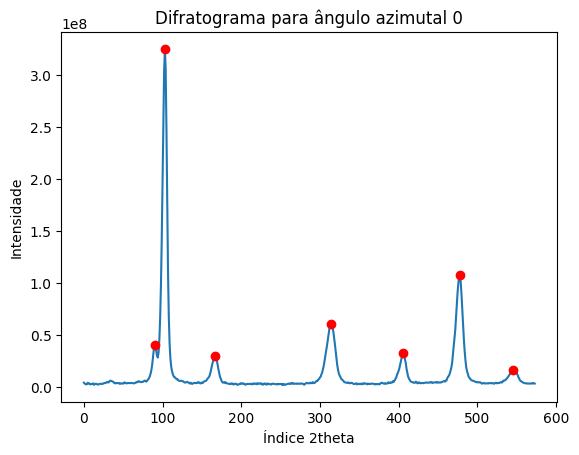

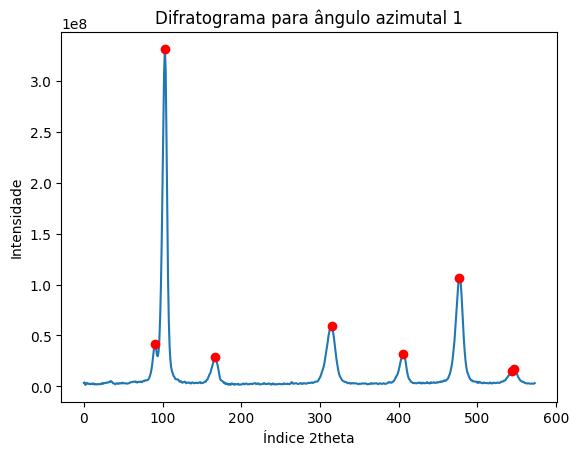

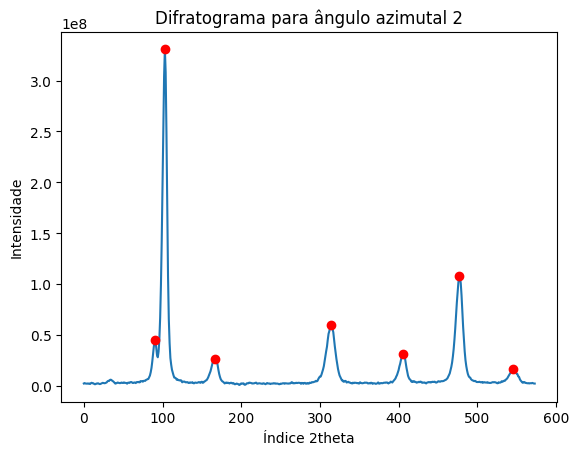

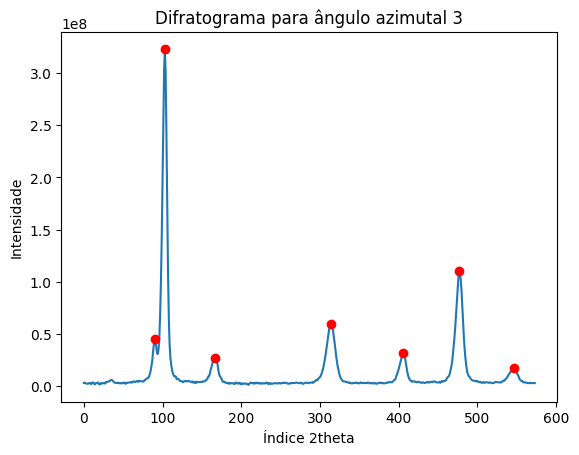

KeyboardInterrupt: ignored

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import pandas as pd


# Carregar o arquivo Excel
file_path = '/content/AzimutX2th.xlsx'
df = pd.read_excel(file_path, header=None)

# Converter o DataFrame para uma matriz numpy
data = df.to_numpy()

# Inicializar uma lista para armazenar os picos encontrados
peaks = []

# Iterar pelas linhas (diferentes ângulos azimutais)
for i in range(data.shape[0]):
    # Calcular o padrão de difração
    diffraction_pattern = data[i, :]

    # Encontrar os picos usando a função find_peaks do scipy
    threshold = 1.5e+07
    peak_indices, _ = find_peaks(diffraction_pattern, height=threshold)

    # Adicionar os picos encontrados à lista de picos
    peaks.append(peak_indices)

    # Plotar o difratograma
    plt.figure()
    plt.plot(diffraction_pattern)
    plt.title(f"Difratograma para ângulo azimutal {i}")
    plt.xlabel("Índice 2theta")
    plt.ylabel("Intensidade")

    # Plotar os picos
    plt.plot(peak_indices, diffraction_pattern[peak_indices], 'ro')  # Pico em vermelho

    # Adicionar as legendas acima de cada pico
    for peak_index in peak_indices:
        plt.annotate(f'Pico {peak_index}', xy=(peak_index, diffraction_pattern[peak_index]),
                 xytext=(0, 10), textcoords='offset points', ha='center', va='bottom', fontsize=8)

plt.show()

# Agora, 'peaks' contém uma lista de índices dos picos para cada linha (ângulo azimutal)


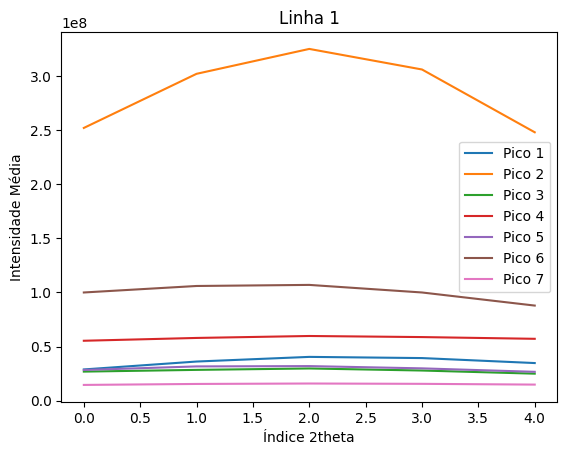

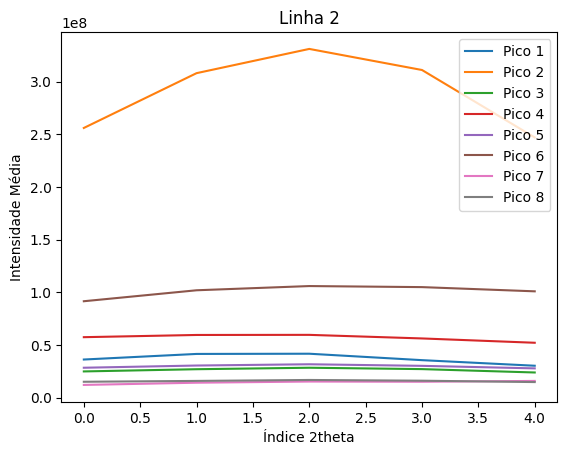

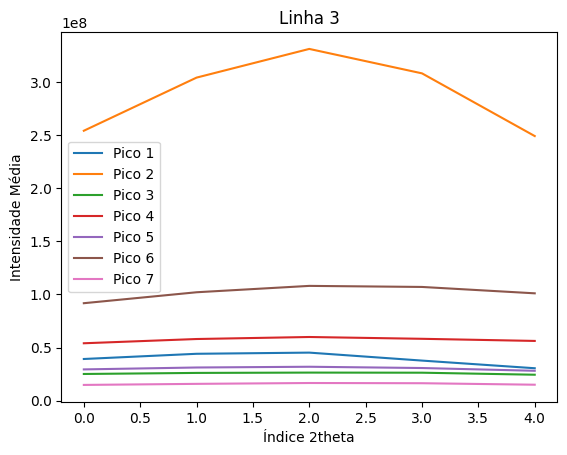

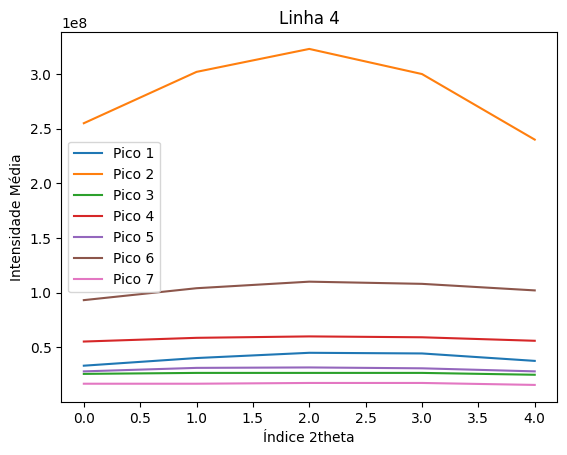

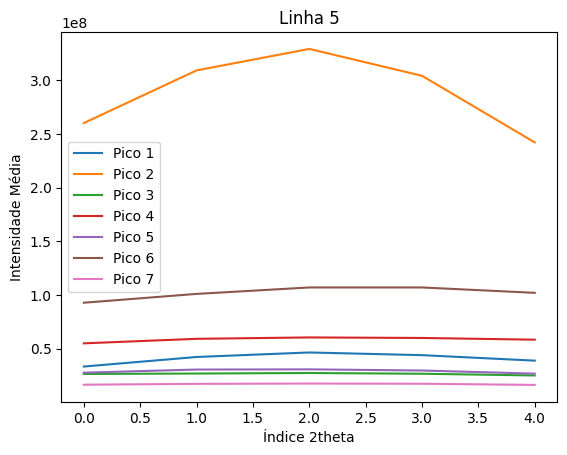

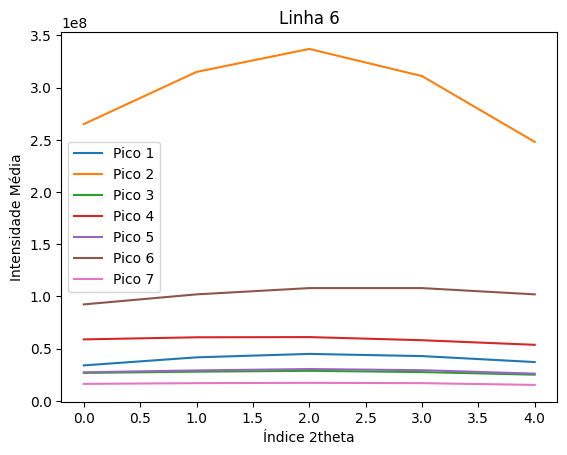

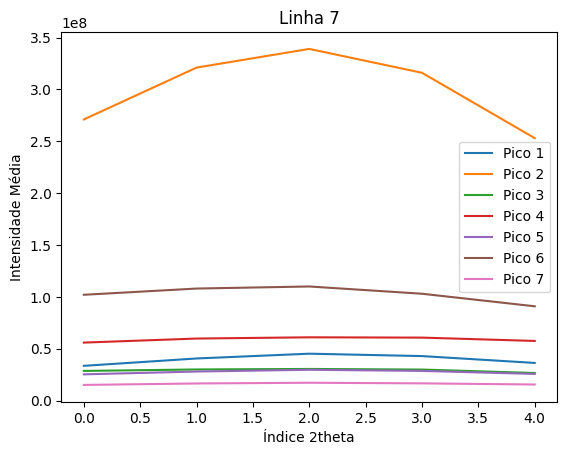

KeyboardInterrupt: ignored

In [ ]:

# Converter o DataFrame para uma matriz numpy
data = df.to_numpy()

# Inicializar uma lista para armazenar os picos e seus pontos adjacentes
peaks_with_adjacent_points = []

# Iterar pelas linhas (diferentes ângulos azimutais)
for i in range(data.shape[0]):
    # Calcular o padrão de difração
    diffraction_pattern = data[i, :]

    # Encontrar os picos usando a função find_peaks do scipy
    threshold = 1.5e+07
    peak_indices, _ = find_peaks(diffraction_pattern, height=threshold)

    # Encontrar 2 pontos anteriores e 2 pontos posteriores para cada pico
    adjacent_points = []
    for peak_index in peak_indices:
        if peak_index >= 2 and peak_index <= len(diffraction_pattern) - 3:
            points = diffraction_pattern[peak_index - 2 : peak_index + 3]
            adjacent_points.append(points)

    peaks_with_adjacent_points.append(adjacent_points)

# Criar gráficos de intensidade por azimutal com média dos picos e pontos adjacentes
for i, peak_list in enumerate(peaks_with_adjacent_points):
    plt.figure()
    plt.title(f"Linha {i + 1}")
    for j, points in enumerate(peak_list):
        averaged_intensity = np.mean(points)
        plt.plot(points, label=f"Pico {j + 1}")

    plt.xlabel("Índice 2theta")
    plt.ylabel("Intensidade Média")
    plt.legend()
    plt.show()


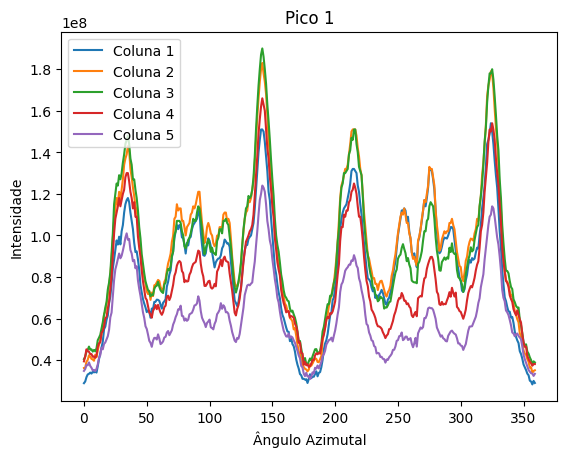

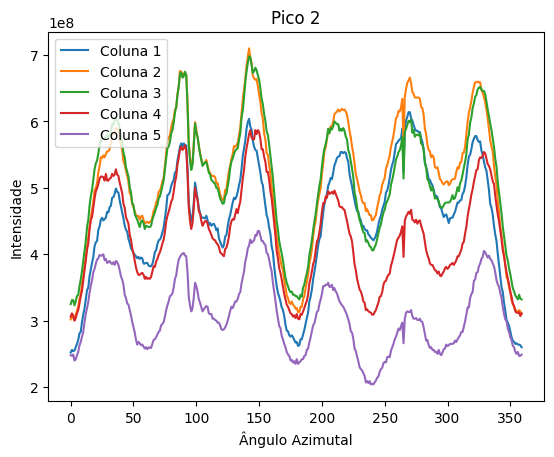

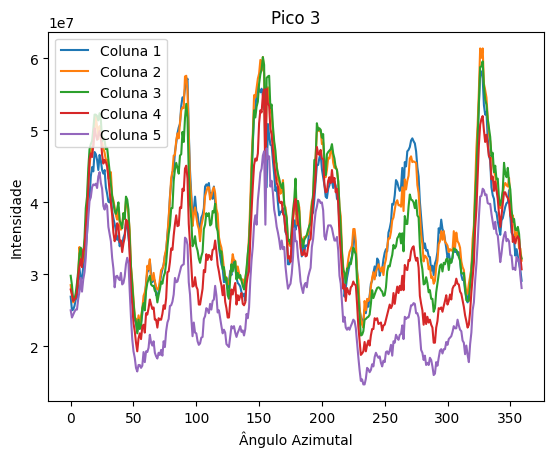

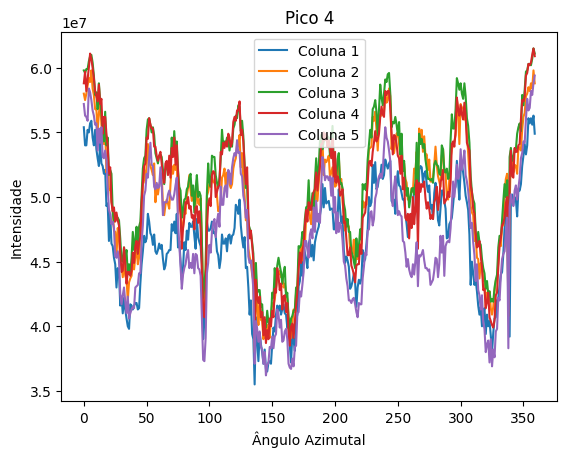

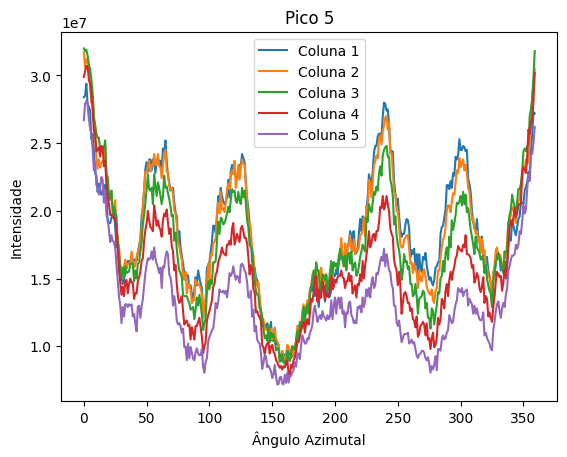

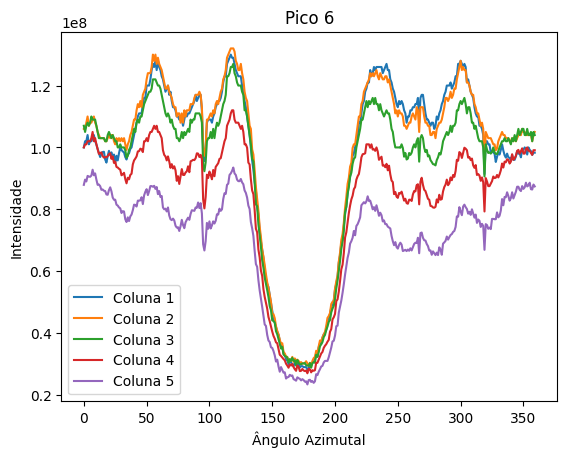

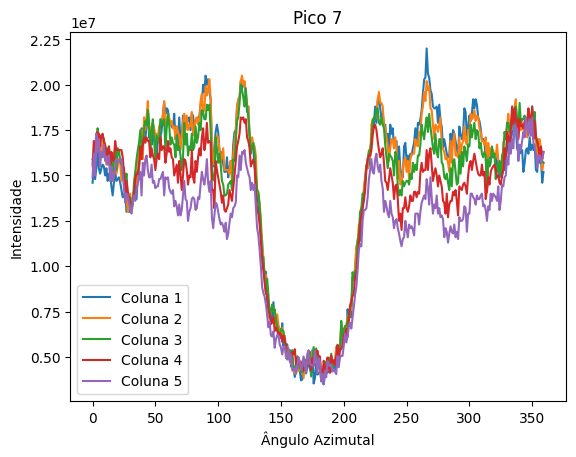

In [ ]:

# Iterar pelas linhas (diferentes ângulos azimutais)
for i in range(data.shape[0]):
    # Calcular o padrão de difração
    diffraction_pattern = data[i, :]

    # Encontrar os picos usando a função find_peaks do scipy
    threshold = 1.5e+07
    peak_indices, _ = find_peaks(diffraction_pattern, height=threshold)

    peaks.append(peak_indices)

# Plotar gráficos separados para cada pico
for pico_num, peak_indices in enumerate(peaks[0]):
    adjacent_columns = []
    if peak_indices >= 2 and peak_indices <= len(diffraction_pattern) - 3:
        for i in range(peak_indices - 2, peak_indices + 3):
            columns = data[:, i]
            adjacent_columns.append(columns)

    plt.figure()
    for i, points in enumerate(adjacent_columns):
        plt.plot(points, label=f"Coluna {i + 1}")

    plt.title(f"Pico {pico_num + 1}")
    plt.xlabel("Ângulo Azimutal")
    plt.ylabel("Intensidade")
    plt.legend()
    plt.show()


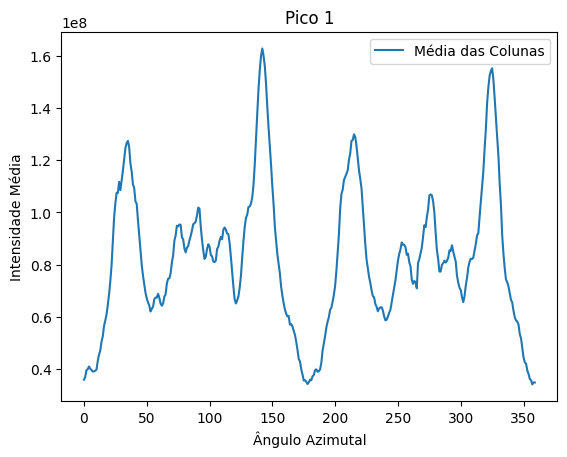

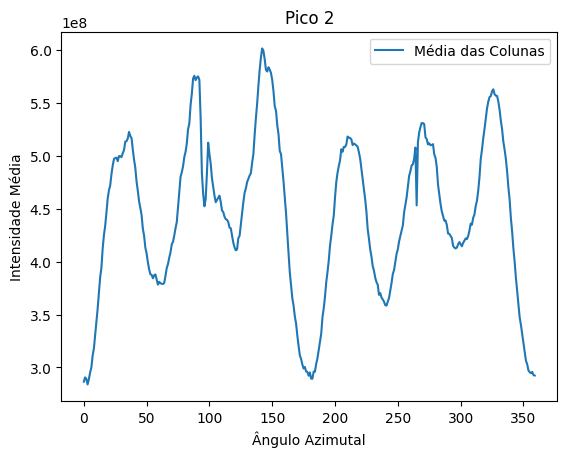

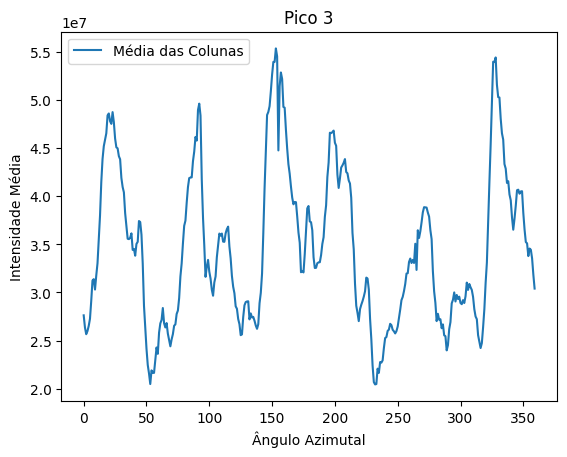

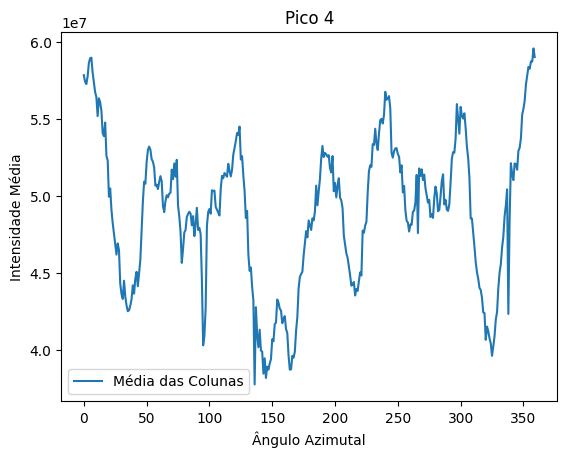

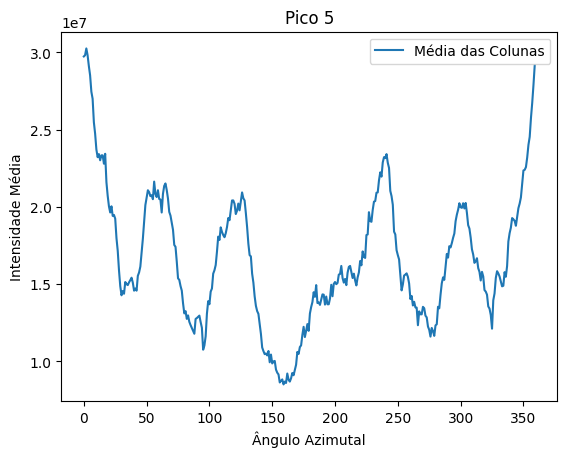

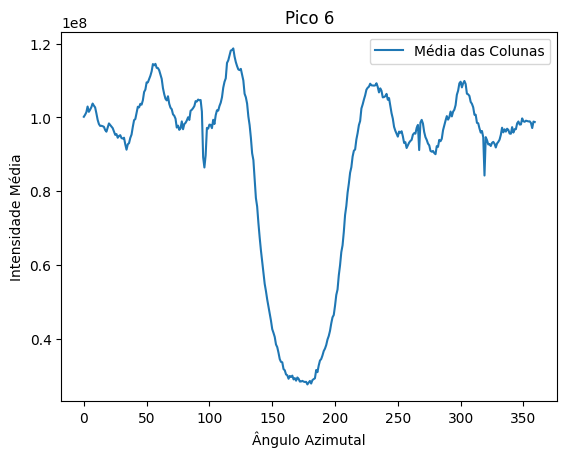

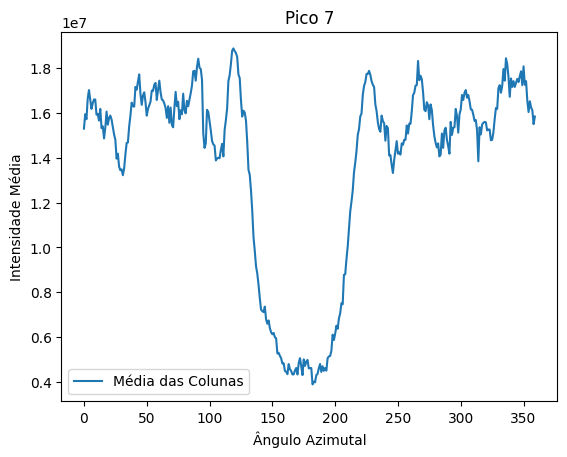

In [ ]:
# Iterar pelas linhas (diferentes ângulos azimutais)
for i in range(data.shape[0]):
    # Calcular o padrão de difração
    diffraction_pattern = data[i, :]

    # Encontrar os picos usando a função find_peaks do scipy
    threshold = 1.5e+07
    peak_indices, _ = find_peaks(diffraction_pattern, height=threshold)

    peaks.append(peak_indices)
# Plotar gráficos separados para cada pico com média das colunas
for pico_num, peak_indices in enumerate(peaks[0]):
    adjacent_columns = []
    if peak_indices >= 2 and peak_indices <= len(diffraction_pattern) - 3:
        for i in range(peak_indices - 2, peak_indices + 3):
            columns = data[:, i]
            adjacent_columns.append(columns)

    averaged_column = np.mean(adjacent_columns, axis=0)

    plt.figure()
    plt.plot(averaged_column, label=f"Média das Colunas")

    plt.title(f"Pico {pico_num + 1}")
    plt.xlabel("Ângulo Azimutal")
    plt.ylabel("Intensidade Média")
    plt.legend()
    plt.show()


Picos [array([ 90, 103, 167, 314, 406, 478, 546]), array([ 91, 103, 167, 315, 406, 477, 544, 547]), array([ 91, 103, 167, 314, 406, 477, 546]), array([ 90, 103, 167, 314, 406, 477, 547]), array([ 90, 103, 167, 314, 406, 477, 546]), array([ 90, 103, 167, 315, 406, 477, 547]), array([ 90, 103, 167, 314, 406, 478, 546]), array([ 90, 103, 166, 314, 406, 477, 547]), array([ 90, 103, 167, 314, 405, 477, 547]), array([ 90, 103, 167, 315, 406, 478, 546]), array([ 90, 103, 168, 314, 406, 477, 545, 547]), array([ 90, 103, 167, 315, 406, 477, 546]), array([ 90, 103, 167, 314, 406, 477, 546]), array([ 90, 103, 167, 314, 406, 477, 546]), array([ 90, 103, 167, 315, 407, 477, 546]), array([ 90, 103, 167, 314, 406, 477, 547]), array([ 89, 103, 167, 315, 406, 477, 547]), array([ 90, 103, 167, 314, 406, 477, 546]), array([ 90, 103, 167, 315, 406, 477, 547]), array([ 90, 103, 167, 314, 406, 478, 547]), array([ 90, 103, 167, 315, 406, 478, 546]), array([ 90, 103, 167, 315, 406, 478, 546]), array([ 90, 103

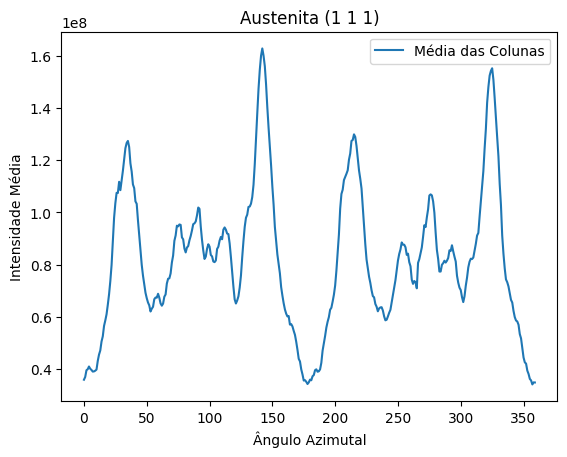

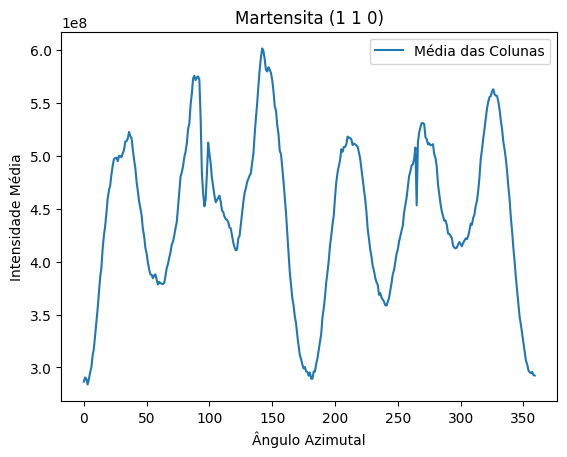

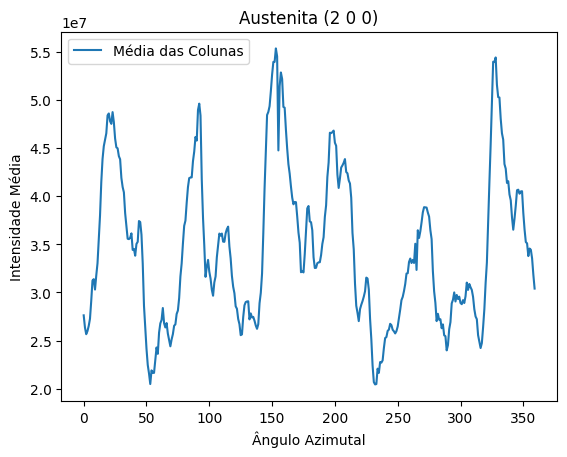

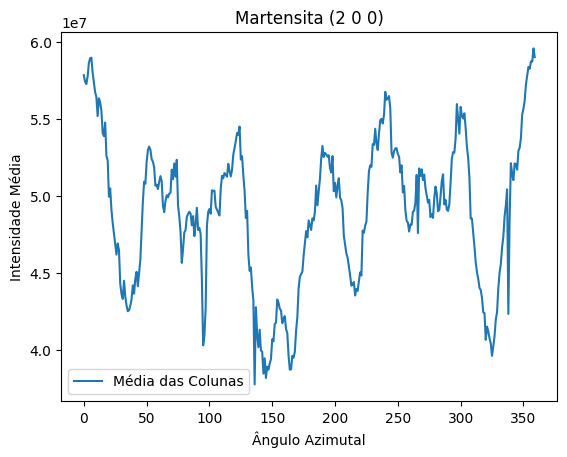

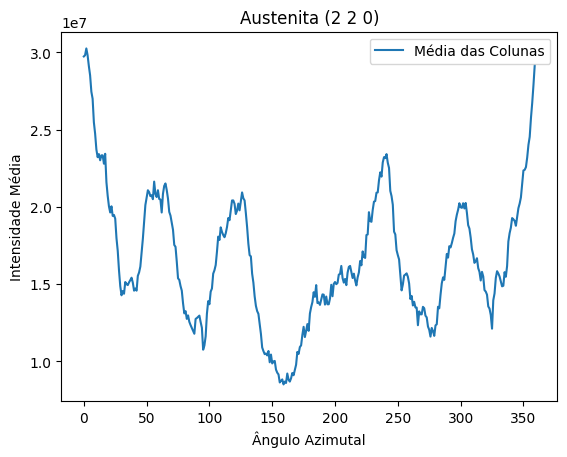

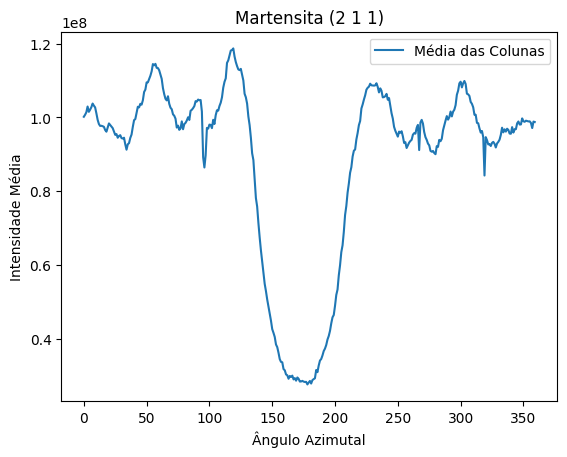

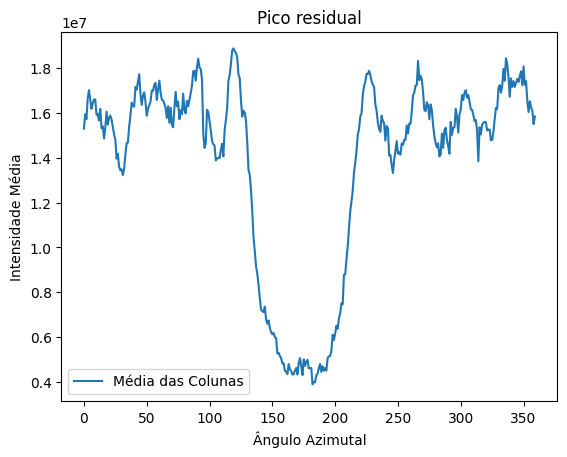

In [ ]:
# Iterar pelas linhas (diferentes ângulos azimutais)
for i in range(data.shape[0]):
    # Calcular o padrão de difração
    diffraction_pattern = data[i, :]
    # Encontrar os picos usando a função find_peaks do scipy
    threshold = 1.5e+07
    peak_indices, _ = find_peaks(diffraction_pattern, height=threshold)
    peaks.append(peak_indices)

print("Picos", peaks)
# Títulos sequenciais para os picos
peak_titles = [
    'Austenita (1 1 1)',
    'Martensita (1 1 0)',
    'Austenita (2 0 0)',
    'Martensita (2 0 0)',
    'Austenita (2 2 0)',
    'Martensita (2 1 1)',
    'Pico residual'
]

# Plotar gráficos separados para cada pico com média das colunas
for pico_num, peak_indices in enumerate(peaks[0]):
    adjacent_columns = []
    if peak_indices >= 2 and peak_indices <= len(diffraction_pattern) - 3:
        for i in range(peak_indices - 2, peak_indices + 3):
            columns = data[:, i]
            adjacent_columns.append(columns)

    averaged_column = np.mean(adjacent_columns, axis=0)

    plt.figure()
    plt.plot(averaged_column, label=f"Média das Colunas")

    plt.title(peak_titles[pico_num])  # Usando o título sequencial
    plt.xlabel("Ângulo Azimutal")
    plt.ylabel("Intensidade Média")
    plt.legend()
    plt.show()
